# **Proyek Analisis Data: Bike Sharing Dataset**
- Nama: Gold Stein Maxwell Massie
- Email: goldsteinmaxwellmassie@gmail.com
- Id Dicoding: maxwellmassie

## Menentukan Pertanyaan Bisnis

- pada hari apa sepeda paling banyak digunakan?
- apakah kondisi cuaca menentukan jumlah dari penggunaan sepeda?
- pada season apa cuaca paling banyak digunakan?
- bagaimana tampilan penyewaan sepeda pada hari kerja(workingday) versus hari libur(weekend)?

## Import Semua Packages/Library yang Digunakan

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.legend_handler import HandlerLine2D

## Data Wrangling

### Gathering Data

**Tahap mengumpulkan data dari dataset bike-sharing-data set yang berisi dua file yaitu day.csv dan hour.csv**

In [81]:
hari_df = pd.read_csv("day.csv")
hari_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**memuat tabel dari file hour.csv**

In [82]:
jam_df = pd.read_csv("hour.csv")
jam_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Tahap Penilaian Data hari_df**

In [83]:
hari_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


pada data diatas kolom dteday bertype data object maka harus diubah menjadi datetime

**memeriksa missing value hari_df**

In [84]:
hari_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


dari hasil diatas tidak memiliki missing value

**memeriksa jumlah duplikasi dan parameter statistik hari_df**

In [85]:
print("Jumlah duplikasi: ", hari_df.duplicated().sum())
hari_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


dari data diatas tidak ada duplikasi dan keanehan dalam data statistiknya

**Tahap penilaian data jam_df**

In [86]:
jam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


pada data diatas kolom dteday bertype data object maka harus diubah menjadi datetime

**memeriksa missing value jam_df**

In [87]:
jam_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


dari hasil diatas tidak memiliki missing value

**memeriksa duplikasi dan ringkasan parameter statistik dari kolom numerik pada jam_df.**

In [88]:
print("Jumlah duplikasi: ",jam_df.duplicated().sum())
jam_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


dari data diatas tidak ada duplikasi dan keanehan dalam data statistiknya

### Cleaning Data

**mengubah typedata dari dteday yang sebelumnya object menjadi datetime pada tabel hari_df**

In [89]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hari_df[column] = pd.to_datetime(hari_df[column])

**memeriksa hasil perubahan**

In [90]:
hari_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**mengubah typedata dari dteday yang sebelumnya object menjadi datetime pada tabel jam_df**

In [91]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  jam_df[column] = pd.to_datetime(jam_df[column])

**memeriksa hasil perubahan**

In [92]:
jam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

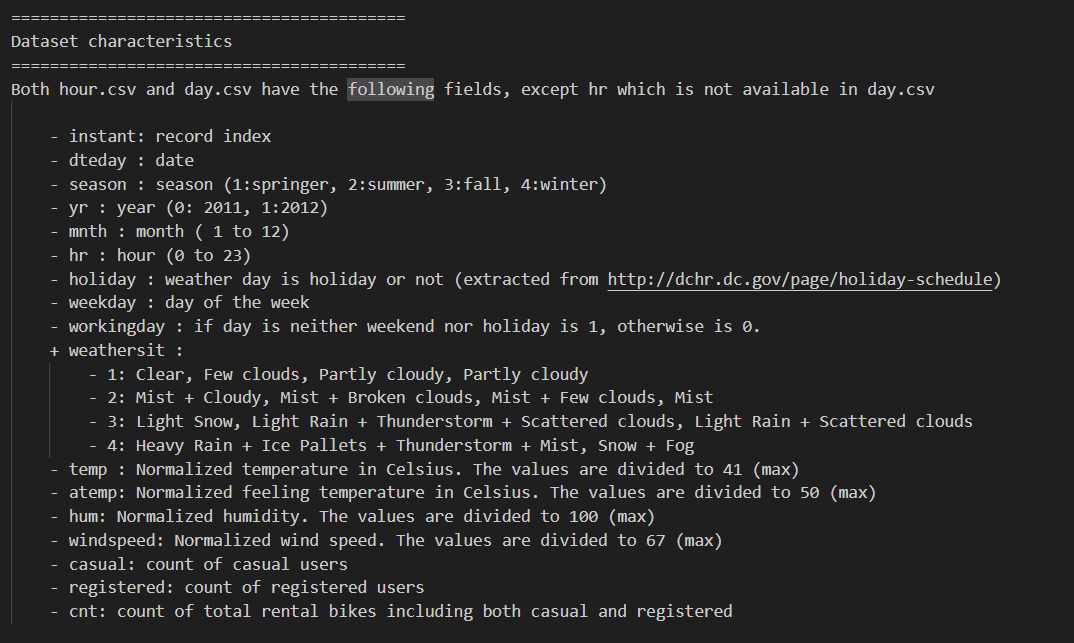**mengubah angka didalam tabel menjadi keterangan sesuai yang tertulis di file Readme.txt seperti pada gambar diatas**

In [93]:
hari_df['mnth'] = hari_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
hari_df['season'] = hari_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hari_df['weekday'] = hari_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hari_df['weathersit'] = hari_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

**mengubah tipe data ke object agar angka yang telah kita ubah sebelumnya tidak menjadi null objek**

In [94]:
hari_df['season'] = hari_df.season.astype('object')
hari_df['yr'] = hari_df.yr.astype('object')
hari_df['mnth'] = hari_df.mnth.astype('object')
hari_df['holiday'] = hari_df.holiday.astype('object')
hari_df['weekday'] = hari_df.weekday.astype('object')
hari_df['workingday'] = hari_df.workingday.astype('object')
hari_df['weathersit	'] = hari_df.weathersit.astype('object')
hari_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weathersit\t
0,1,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,Misty/Cloudy
1,2,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801,Misty/Cloudy
2,3,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Clear/Partly Cloudy
3,4,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Clear/Partly Cloudy
4,5,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Clear/Partly Cloudy


## Exploratory Data Analysis (EDA)

### Explore Data hari_df

**membuat pivot table data penyewa sepeda berdasarkan bulan(mnth)**

In [95]:
hari_df.groupby(by="mnth").agg({
    "cnt": ["max", "min", "mean", "sum", "std"]
})

cnt                                        
       max   min         mean     sum          std
mnth                                              
Apr   7460   795  4484.900000  269094  1776.160778
Aug   7865  1115  5664.419355  351194  1494.516146
Dec   6606   441  3403.806452  211036  1549.639353
Feb   5062  1005  2655.298246  151352  1145.313307
Jan   4521   431  2176.338710  134933  1161.674370
Jul   8173  3285  5563.677419  344948  1273.751871
Jun   8120  3767  5772.366667  346342  1240.400031
Mar   8362   605  3692.258065  228920  1899.301812
May   8294  2633  5349.774194  331686  1298.711561
Nov   6852  1495  4247.183333  254831  1285.712709
Oct   8156    22  5199.225806  322352  1988.392517
Sep   8714  1842  5766.516667  345991  1810.130649

dari hasil diatas dapat disimpulkan bahwa rata-rata terkecil dan jumlah terkecil berada di bulan januari dan sebaliknya rata-rata terbesar dan jumlah terbanyak berada di bulan juni.

**membuat pivot table data penyewa sepeda berdasarkan cuaca(wathersit)**

In [96]:
hari_df.groupby(by="weathersit").agg({
    "cnt": ["max", "min", "mean", "sum", "std"]
})

cnt                                        
                      max  min         mean      sum          std
weathersit                                                       
Clear/Partly Cloudy  8714  431  4876.786177  2257952  1879.483989
Light Snow/Rain      4639   22  1803.285714    37869  1240.284449
Misty/Cloudy         8362  605  4035.862348   996858  1809.109918

dari hasil diatas dapat disimpulkan bahwa penyewa sepeda lebih banyak pada cuaca cerah(clear) lebih sedikit pada cuaca hujan atau mendung.

**membuat pivot table data penyewa sepeda berdasarkan holiday**

In [97]:
hari_df.groupby(by="holiday").agg({
    "cnt": ["max", "min", "mean", "sum", "std"]
})

cnt                                         
          max   min         mean      sum          std
holiday                                               
0        8714    22  4527.104225  3214244  1929.013947
1        7403  1000  3735.000000    78435  2103.350660

dari hasil diatas dapat disimpulkan bahwa penyewa sepeda lebih banyak pada hari kerja(workingday) dibandingkan hari libur(holiday)

**membuat pivot berbandingan antara weekday dengan weekend**

In [98]:
hari_df.groupby(by="weekday").agg({
    "cnt": ["max", "min", "mean", "sum", "std"]
})

cnt                                        
          max   min         mean     sum          std
weekday                                              
Fri      8362  1167  4690.288462  487790  1874.624870
Mon      7525    22  4338.123810  455503  1793.074013
Sat      8714   627  4550.542857  477807  2196.693009
Sun      8227   605  4228.828571  444027  1872.496629
Thu      7804   431  4667.259615  485395  1939.433317
Tue      7767   683  4510.663462  469109  1826.911642
Wed      8173   441  4548.538462  473048  2038.095884

dari hasil diatas dapat disimpulkan bahwa penyewaan sepeda dari terkecil-terbesar yaitu : Sun-Mon-Tue-Wed-Sat-Thu-Fri.

**membuat pivot tabel data penyewa berdasarkan workingday**

In [99]:
hari_df.groupby(by="workingday").agg({
    "cnt": ["max", "min", "mean", "sum", "std"]
})

cnt                                        
             max  min         mean      sum          std
workingday                                              
0           8714  605  4330.168831  1000269  2052.141245
1           8362   22  4584.820000  2292410  1878.415583

dari data diatas dapat disimpulkan bahwa penyewaan sepeda terbanyak berpada pada harikerja(workingday)

**membuat pivot tabel data penyewa berdasarkan season**

In [100]:
hari_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': ['max', 'min', 'mean']
})

casual   registered   cnt                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

dari data diatas dapat disimpulkan bahwa rata-rata penyewaan sepeda terbesar pada season Fall dan rata-rata terkecil pada season Spring

**berdasarkan season dibuat pengelompokan temp, hum, dan humidity**

In [101]:
hari_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean']
})


temp                         atemp                           hum  \
             max       min      mean       max       min      mean       max   
season                                                                         
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   

                            
             min      mean  
season                      
Fall    0.360000  0.633482  
Spring  0.000000  0.582903  
Summer  0.254167  0.626948  
Winter  0.333478  0.668719

dari data diatas dapat disimpulkan bahwa temperatur tertinggi pada season fall dan rata-rata hum tertinggi pada season winter

**membuat korelasi map antara cnt, casual, dan registered**

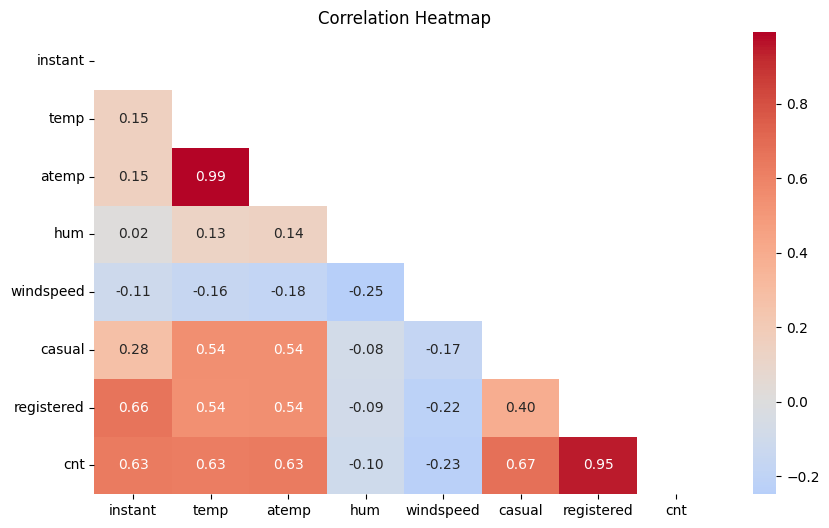

In [102]:
fig, ax = plt.subplots(figsize=(10, 6))
correlation_matrix = hari_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f"
)
plt.title("Correlation Heatmap")
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: pada hari apa sepeda paling banyak digunakan?

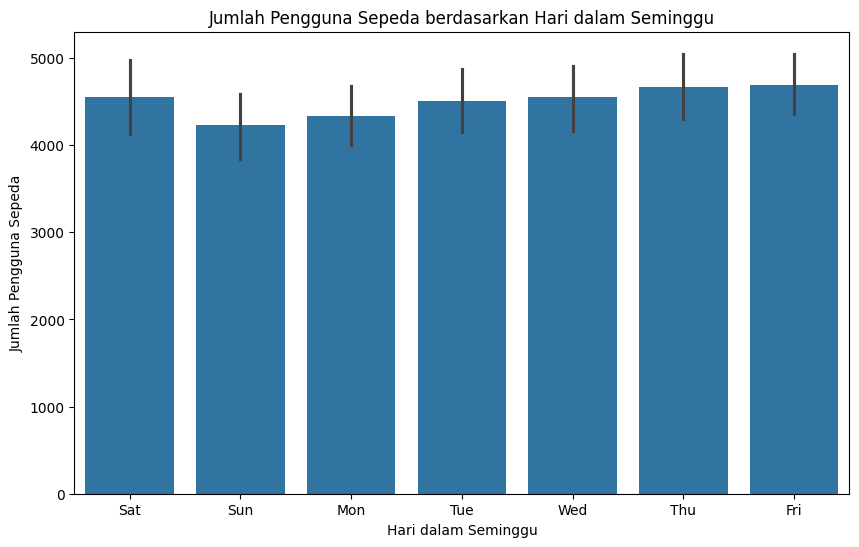

In [103]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', data=hari_df)
plt.title('Jumlah Pengguna Sepeda berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Pengguna Sepeda')

plt.show()

### Pertanyaan 2: apakah kondisi cuaca menentukan jumlah dari penggunaan sepeda?

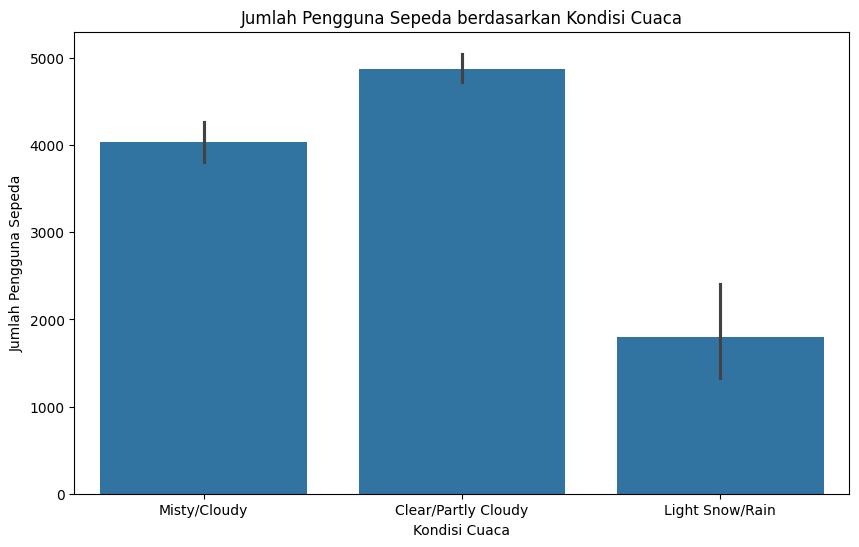

In [104]:
plt.figure(figsize=(10, 6))
sns.barplot( x='weathersit', y='cnt', data=hari_df)
plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')

plt.show()

### Pertanyaan 3: pada season apa sepeda paling banyak digunakan?

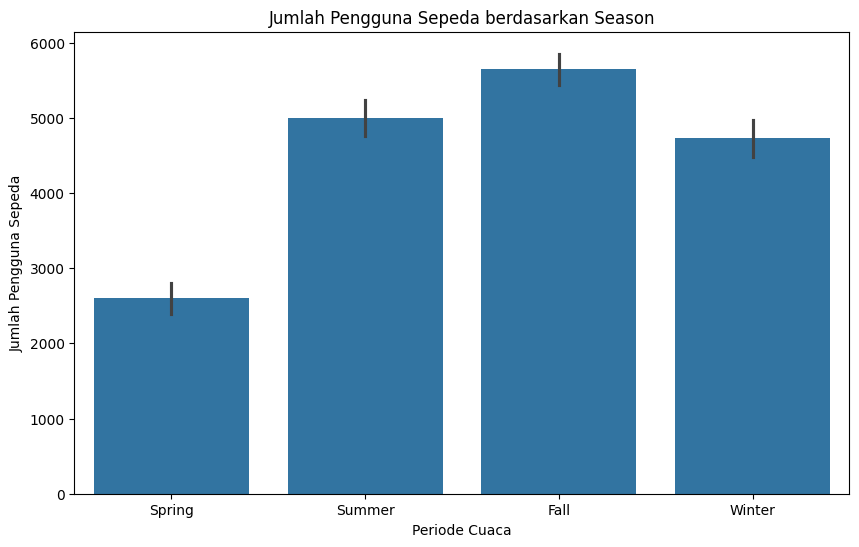

In [105]:
plt.figure(figsize=(10,6))
sns.barplot(x='season', y='cnt', data=hari_df)
plt.title('Jumlah Pengguna Sepeda berdasarkan Season')
plt.xlabel('Periode Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')

plt.show()

### Pertanyaan 4: bagaimana tampilan penyewaan sepeda pada hari kerja(workingday) versus hari libur(holiday)?

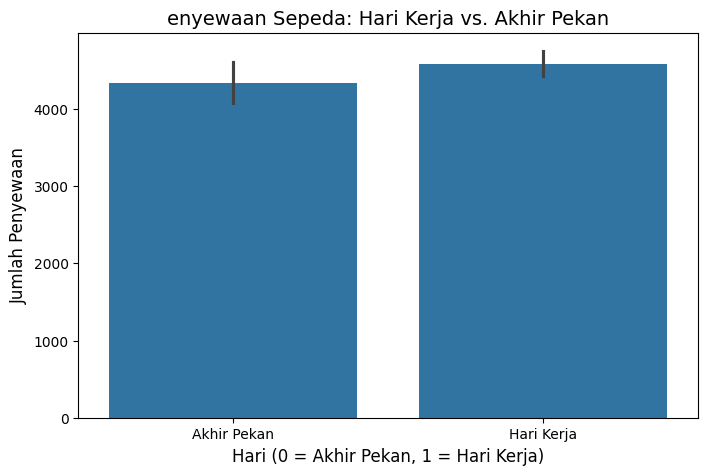

In [106]:
plt.figure(figsize=(8, 5))
sns.barplot(x='workingday', y='cnt', data=hari_df)

plt.title("enyewaan Sepeda: Hari Kerja vs. Akhir Pekan", fontsize=14)
plt.xlabel("Hari (0 = Akhir Pekan, 1 = Hari Kerja)", fontsize=12)
plt.ylabel("Jumlah Penyewaan", fontsize=12)

plt.xticks(ticks=[0, 1], labels=["Akhir Pekan", "Hari Kerja"])
plt.show()

## Analisis Lanjutan

**1. Clustering Analisis berdasarkan Pagi, Siang, Sore, Malam**

Kode ini melakukan clustering manual dengan mengelompokkan waktu peminjaman sepeda ke dalam empat kategori berdasarkan jam (hr):

- Pagi (06:00 - 11:59)
- Siang (12:00 - 15:59)
- Sore (16:00 - 19:59)
- Malam (20:00 - 05:59)


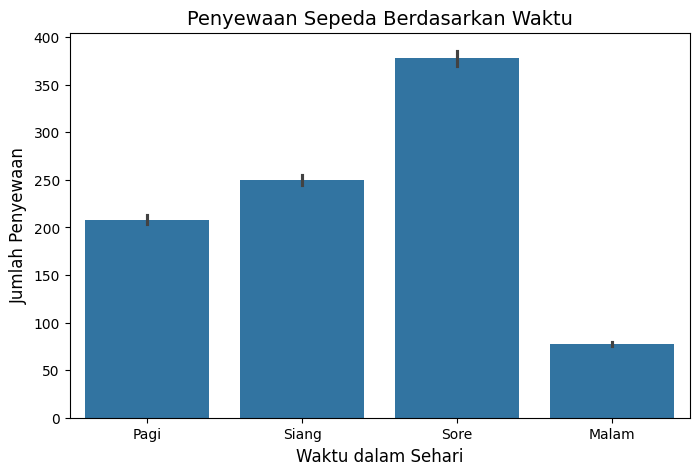

In [107]:
def assign_time_cluster(hr):
    if 6 <= hr < 12:
        return "Pagi"
    elif 12 <= hr < 16:
        return "Siang"
    elif 16 <= hr < 20:
        return "Sore"
    else:
        return "Malam"

jam_df['time_cluster'] = jam_df['hr'].apply(assign_time_cluster)

#VisualisasiPenyewaan Berdasarkan Waktu
plt.figure(figsize=(8, 5))
sns.barplot(x='time_cluster', y='cnt', data=jam_df, order=["Pagi", "Siang", "Sore", "Malam"])

plt.title("Penyewaan Sepeda Berdasarkan Waktu", fontsize=14)
plt.xlabel("Waktu dalam Sehari", fontsize=12)
plt.ylabel("Jumlah Penyewaan", fontsize=12)

plt.show()

## Conclusion/Kesimpulan dari setiap Pertanyaan diatas

- **Conclution pertanyaan 1:**

Dari hasil program untuk pertanyaan 1 dapat disimpulkan bahwa jumlah penyewaan sepeda terbanyak adalah pada hari Fri(jumat) dan Jumlah penyewaan paling sedikit adalah pada hari Sun(Minggu).

- **Conclution pertanyaan 2:**

Dari hasil program untuk pertanyaan 2 dapat disimpulkan bahwa jumlah penyewaan sepeda paling banyak adalah pada cuaca Clear(cerah) dan yang paling sedikit pada cuaca Rain(hujan). Itu artinya cuaca memengaruhi keputusan pesepeda untuk menyewa sepeda.

- **Conclution pertanyaan 3:**

Dari hasil program untuk pertanyaan 3 dapat disimpulkan bahwa jumlah penyewaan sepeda terbanyak adalah pada season Fall dan yang paling sedikit pada season Spring.
- **Conclution pertanyaan 4:**

Dari hasil program untuk pertanyaan 4 dapat disimpulkan penyewaan sepeda paling banyak pada hari kerja(workingday) dari pada hari libur(holiday). Pada visualisasi pertanyaan 4 terdapat 0 dan 1 yang artinya 0(weekend) dan 1(workingday).

**Conclution Untuk Clustering Analisis:**

**1. Clustering Analisis:**

- Pagi & Sore adalah waktu dengan jumlah peminjaman tertinggi yang menunjukkan pola perjalanan kerja/sekolah.
- Siang mengalami sedikit penurunan, kemungkinan karena waktu istirahat.
- Malam memiliki peminjaman paling sedikit karena biasanya sepeda lebih jarang digunakan di malam hari.

dari hasil analsisi clustering dapat diambil untuk keputusan bisnis yaitu:
- Menambah jumlah sepeda saat pagi & sore hari untuk memenuhi permintaan tinggi.

**Tahap terakhir adalah menyimpan berkas yang telah dibersihkan untuk membuat dashboard**

In [108]:
hari_df.to_csv("cleaned_hari_data.csv", index=False)

In [109]:
jam_df.to_csv("cleaned_jam_data.csv", index=False)